In [16]:
import pandas as pd
import numpy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("module loaded")

module loaded


In [17]:
pip install git+https://github.com/amueller/dabl/

  Cloning https://github.com/amueller/dabl/ to /tmp/pip-req-build-6d4p4hfx
  Running command git clone --filter=blob:none --quiet https://github.com/amueller/dabl/ /tmp/pip-req-build-6d4p4hfx
  Resolved https://github.com/amueller/dabl/ to commit a9bd5943121b12135e8efb241c6c8269275e744b
  Preparing metadata (setup.py) ... done


In [18]:
import dabl

In [19]:
data=pd.read_csv("diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
df=pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Target looks like classification


/usr/local/lib/python3.10/dist-packages/dabl/plot/utils.py:692: UserWarning: Dropped 1 outliers in column Insulin.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.10/dist-packages/dabl/plot/utils.py:692: UserWarning: Dropped 1 outliers in column SkinThickness.
  warn("Dropped {} outliers in column {}.".format(


Linear Discriminant Analysis training set score: 0.737


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='class'>,
 [<Figure size 1600x400 with 8 Axes>,
  array([[<Axes: title={'center': '0.710'}, xlabel='Glucose', ylabel='SkinThickness'>,
          <Axes: title={'center': '0.699'}, xlabel='Glucose', ylabel='BMI'>,
          <Axes: title={'center': '0.689'}, xlabel='Glucose', ylabel='Insulin'>,
          <Axes: title={'center': '0.687'}, xlabel='Glucose', ylabel='BloodPressure'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 None]

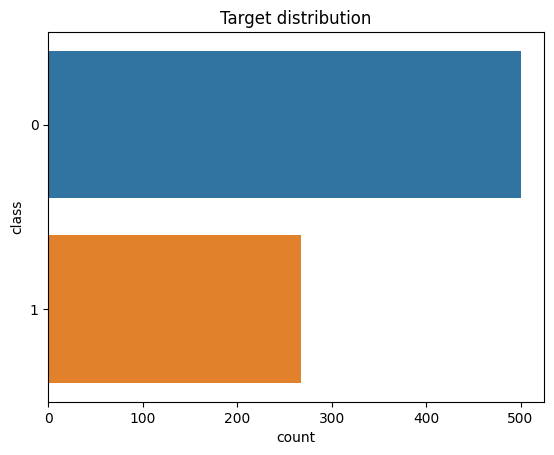

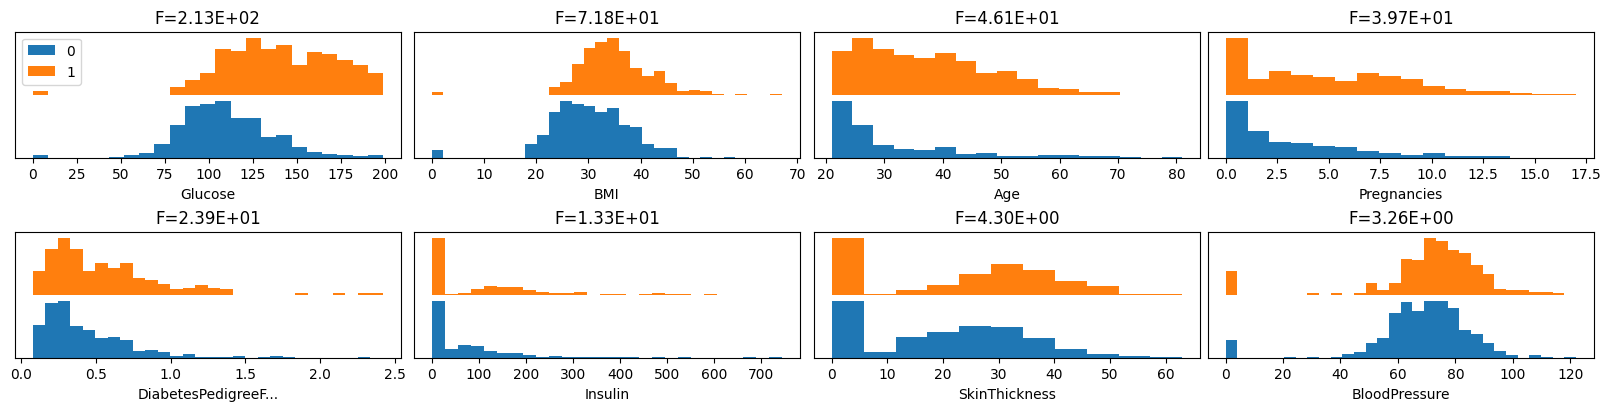

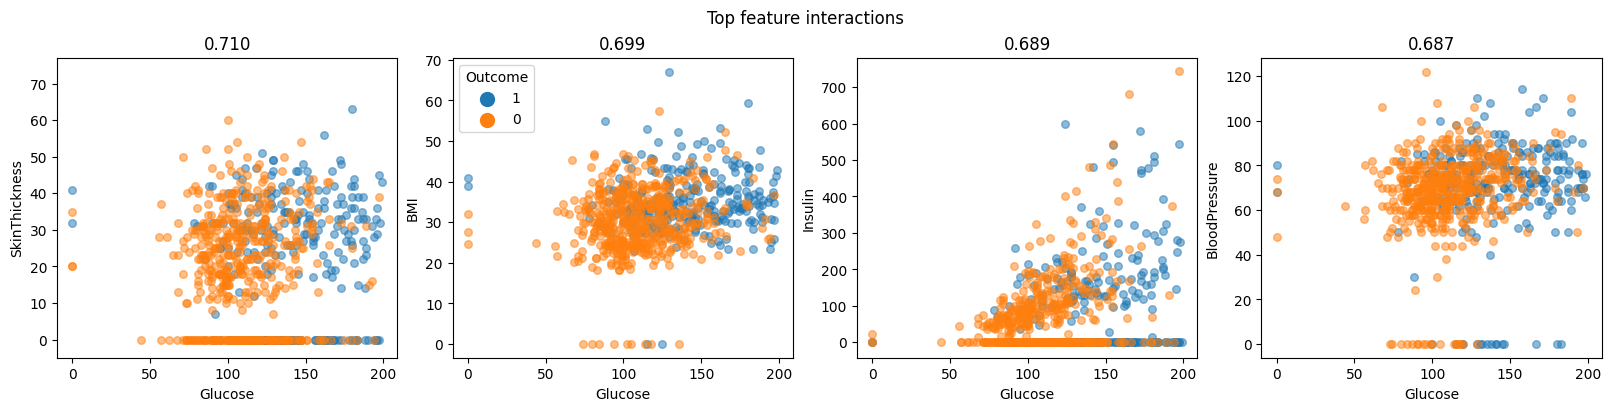

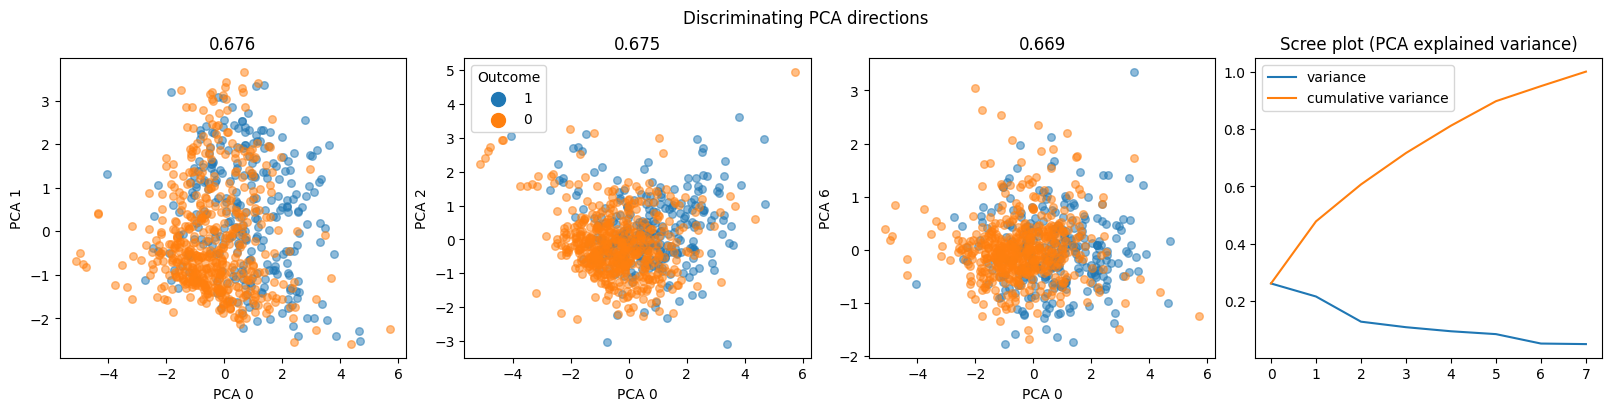

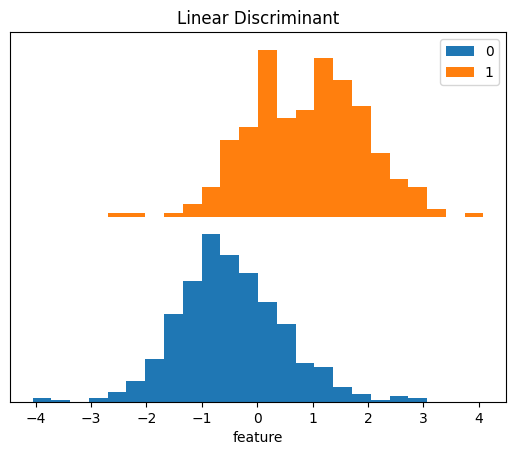

In [22]:
dabl.plot(df,target_col="Outcome")

In [23]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [24]:
x_train , x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [25]:
# Create a decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()

In [27]:
# Fit the classifier to the training data
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
# Make predictions on the test set
y_pred = decision_tree_classifier.predict(x_test)

In [29]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7662337662337663


In [30]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        99
           1       0.65      0.76      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.77      0.77       154

